**CIFAR-10 Photo Classification Dataset**

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

# **Load dataset and visualization**

In [1]:
#load dataset and visualization

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(X_train_0, y_train_0), (X_test_0, y_test_0) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_0.shape, y_train_0.shape))
print('Test: X=%s, y=%s' % (X_test_0.shape, y_test_0.shape))

170508288/170498071 [==============================] - 7s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


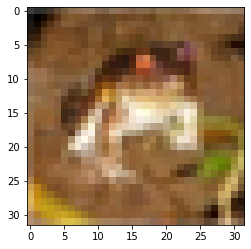

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train_0[0])

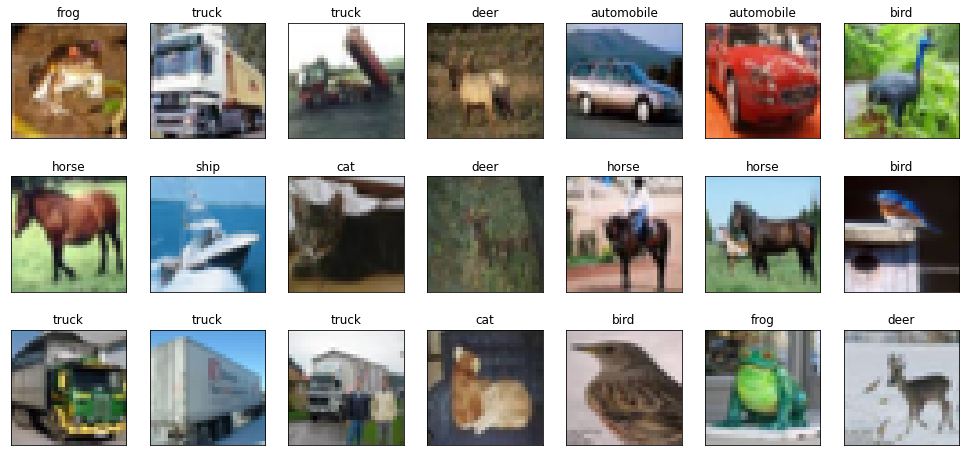

In [3]:


labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train_0[index][0]])
        axes[i,j].imshow(X_train_0[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [4]:
X_train_0

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
y_test_0

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# **Normalization of Data**

In [6]:
X_train, X_test = X_train_0.astype('float32')/255.0, X_test_0.astype('float32')/255.0

In [7]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

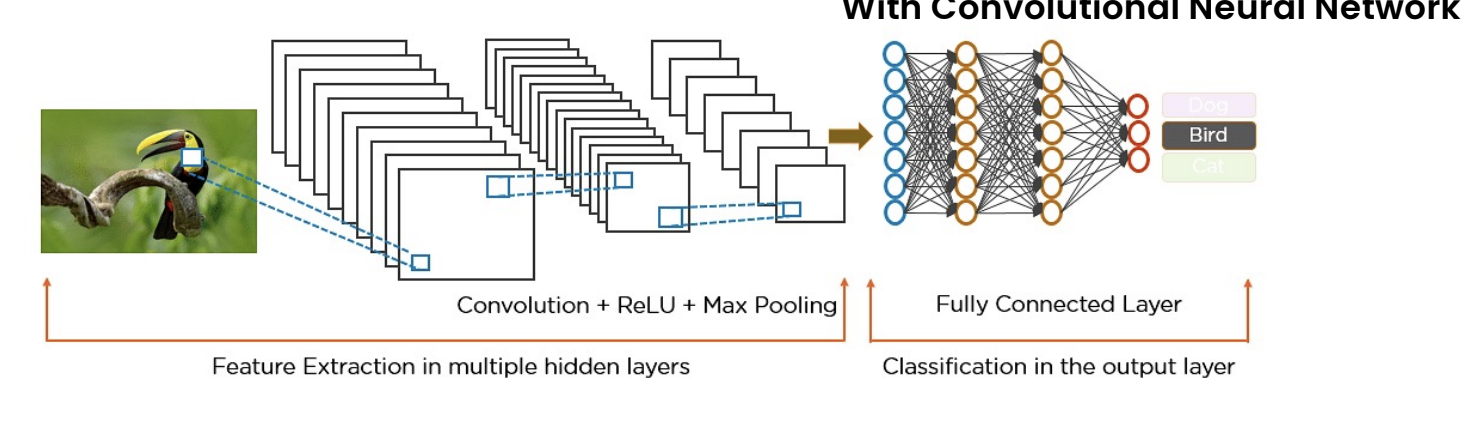

# **y: Convert to Categorical**

In [8]:
#from keras.utils import np_utils as utils
# One-Hot-Encoding

#y_train, y_test = utils.to_categorical(y_train_0, 10), utils.to_categorical(y_test_0, 10)
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train_0)
y_train = one_hot_encoder.transform(y_train_0)
y_test = one_hot_encoder.transform(y_test_0)

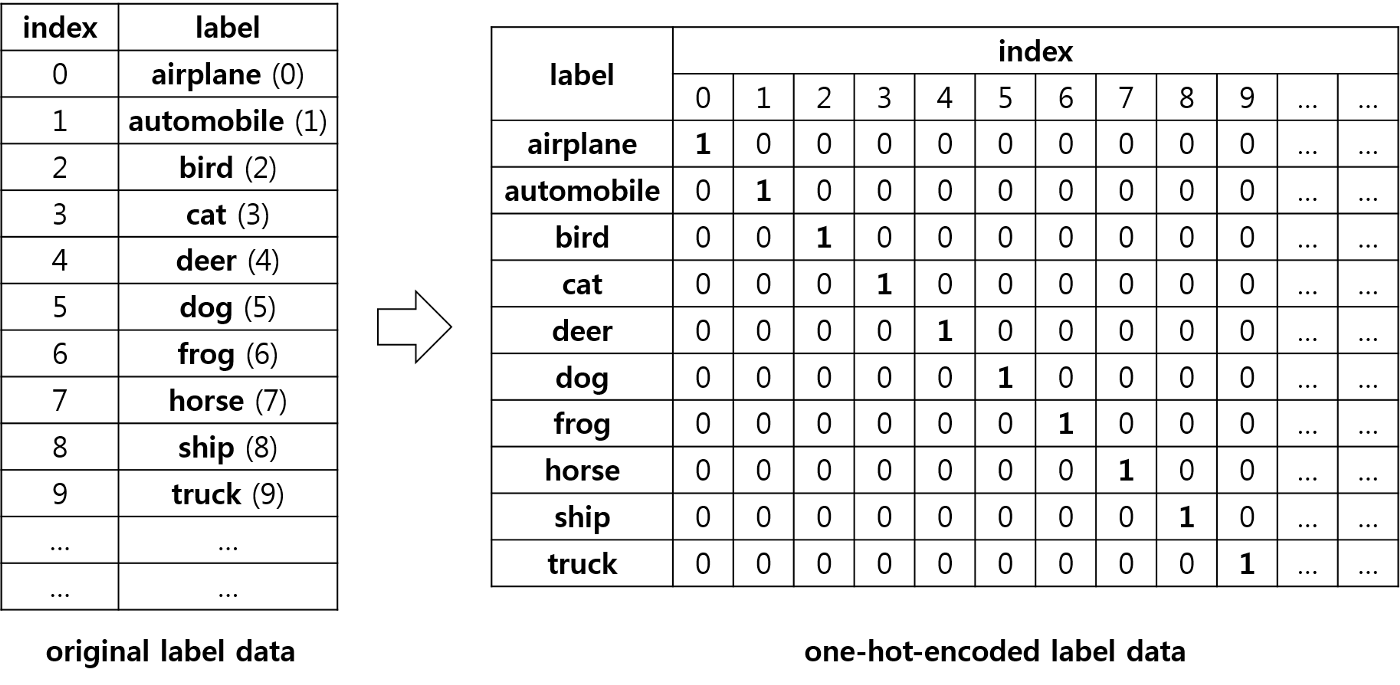

In [9]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [10]:
y_test_0[2, :]

array([8], dtype=uint8)

In [11]:
y_test[2, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

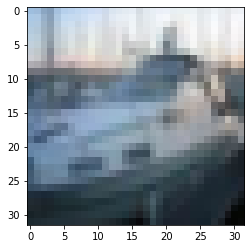

In [12]:
pyplot.imshow(X_test_0[2])

# **Build CNNs Model**

In [13]:
import numpy as np
import pandas as pd

#from keras.optimizers import SGD
#from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [14]:
model_CNN = Sequential()

## **Add Convolutional Layer**


1.   Features map/#filter = 32 
2.   Kernel size (length of the convolution window) = 3X3
1.   Input shape = 32X32
2.   Channels = 3










In [15]:
model_CNN.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))

## **Add anther CNN Layer**



In [ ]:
#model_CNN.add(Conv2D(32, (3, 3), activation='relu'))

## **Add Max Pooling Layer**

In [16]:
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

## **Flatten the data**

In [17]:
model_CNN.add(Flatten())

##**Add Dense Layer**

In [18]:
model_CNN.add(Dense(512, activation='relu'))

## **Add Output Dense Layer**

In [19]:
model_CNN.add(Dense(10, activation='softmax'))

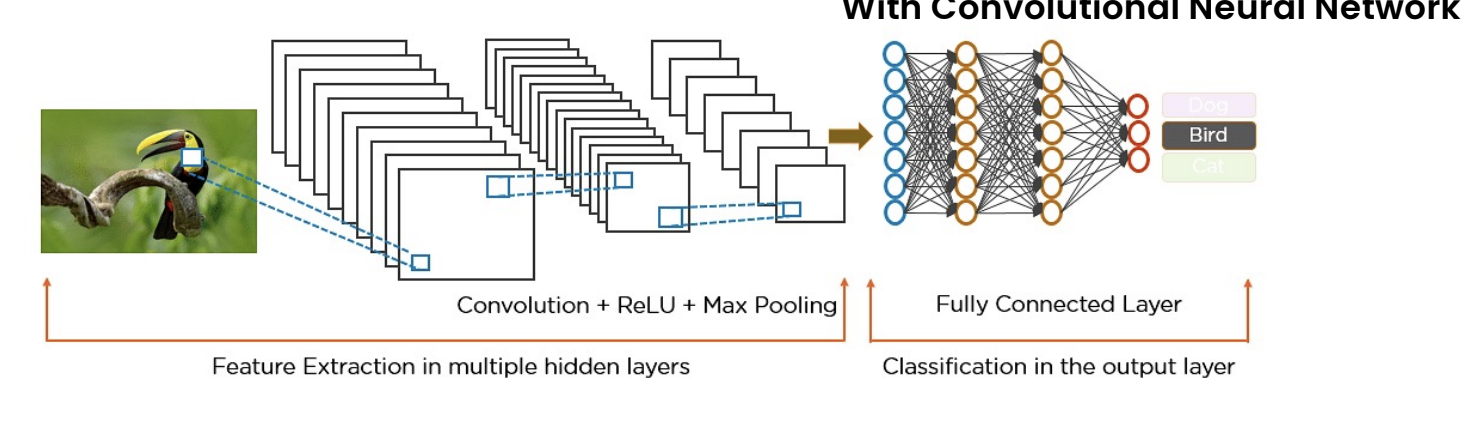

## **Compile the Model**

In [20]:
model_CNN.compile(loss = 'categorical_crossentropy', 
               optimizer=RMSprop(learning_rate=0.001), 
               metrics = ['accuracy'])

In [21]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,692,938
Trainable params: 3,692,938
Non-trainable params: 0
______________________________________________

## **Fit the Algorithm**

In [22]:
# The more epochs, higher accuracy rate
history_CNN = model_CNN.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=5,
          batch_size=512)

Epoch 1/5
98/98 [==============================] - 13s 20ms/step - loss: 1.9509 - accuracy: 0.3546 - val_loss: 1.4859 - val_accuracy: 0.4799
Epoch 2/5
98/98 [==============================] - 1s 15ms/step - loss: 1.4833 - accuracy: 0.4825 - val_loss: 1.4267 - val_accuracy: 0.4950
Epoch 3/5
98/98 [==============================] - 1s 15ms/step - loss: 1.3457 - accuracy: 0.5314 - val_loss: 1.2824 - val_accuracy: 0.5460
Epoch 4/5
98/98 [==============================] - 1s 15ms/step - loss: 1.2468 - accuracy: 0.5663 - val_loss: 1.2502 - val_accuracy: 0.5605
Epoch 5/5
98/98 [==============================] - 1s 15ms/step - loss: 1.1622 - accuracy: 0.5975 - val_loss: 1.1769 - val_accuracy: 0.5888


Text(0, 0.5, 'Loss')

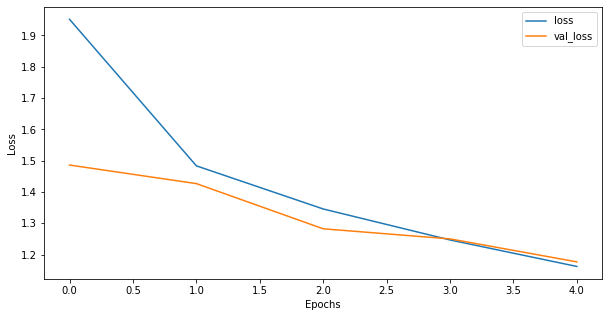

In [23]:
# Plot loss per iteration

plt.rcParams['figure.figsize'] = [10,5]
plt.plot(history_CNN.history['loss'], label='loss')
plt.plot(history_CNN.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'accuracy')

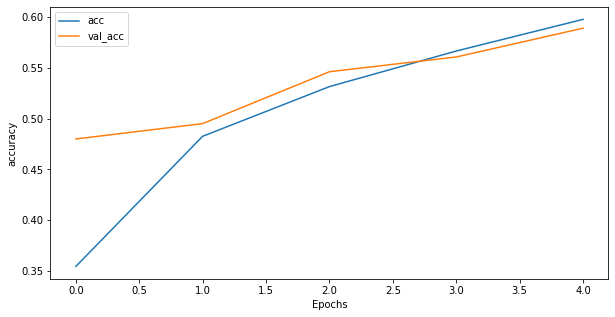

In [24]:
# Plot accuracy per iteration
plt.plot(history_CNN.history['accuracy'], label='acc')
plt.plot(history_CNN.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("accuracy")

## Evaluation

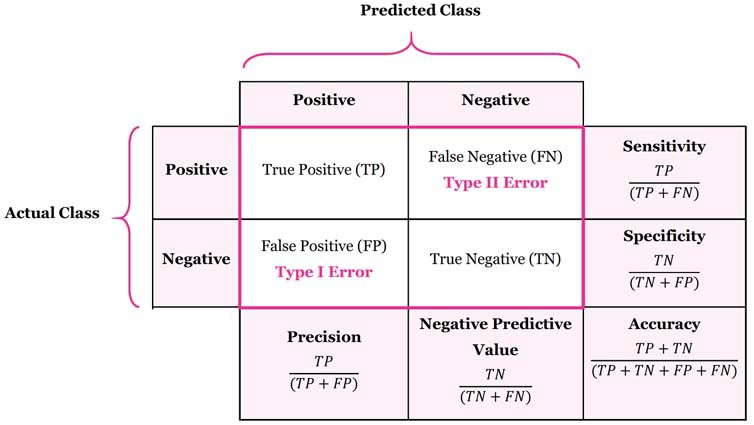

In [25]:
# evaluate model by accuracy
_, acc = model_CNN.evaluate(X_test, y_test, verbose=0)
print(acc)

0.5888000130653381


## **Prediction**


In [26]:
y_pred_ = model_CNN.predict(X_test)
y_pred_

array([[7.7375104e-03, 7.0621661e-04, 1.6900335e-02, ..., 1.2347950e-03,
        2.7680049e-02, 3.6664354e-04],
       [1.0356208e-01, 4.3690962e-01, 2.5972995e-04, ..., 2.1994360e-06,
        4.2130741e-01, 3.7765022e-02],
       [2.5004563e-01, 6.1524212e-02, 5.8368817e-03, ..., 1.1451297e-03,
        5.3848827e-01, 1.3599557e-01],
       ...,
       [1.6623753e-03, 8.0036453e-04, 1.6908173e-01, ..., 4.4049047e-02,
        2.4664132e-03, 2.2789154e-03],
       [3.1456508e-02, 7.8857207e-01, 1.2040554e-02, ..., 5.5691916e-03,
        3.4920382e-03, 1.7249938e-02],
       [2.4846592e-03, 1.2271806e-03, 1.2153208e-02, ..., 8.2238609e-01,
        1.3982123e-03, 3.1083727e-03]], dtype=float32)

In [27]:
#The result is probability of being that class
y_pred_[0, :]

array([7.7375104e-03, 7.0621661e-04, 1.6900335e-02, 7.5195622e-01,
       4.3790308e-03, 1.8092871e-01, 8.1104264e-03, 1.2347950e-03,
       2.7680049e-02, 3.6664354e-04], dtype=float32)

In [28]:
sum(y_pred_[0, :])

0.9999999374267645

In [29]:
y_pred_ohe = one_hot_encoder.inverse_transform(y_pred_)

In [30]:
y_pred_ohe

array([[3],
       [1],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [32]:
y_test_ohe = one_hot_encoder.inverse_transform(y_test)
y_test_ohe

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

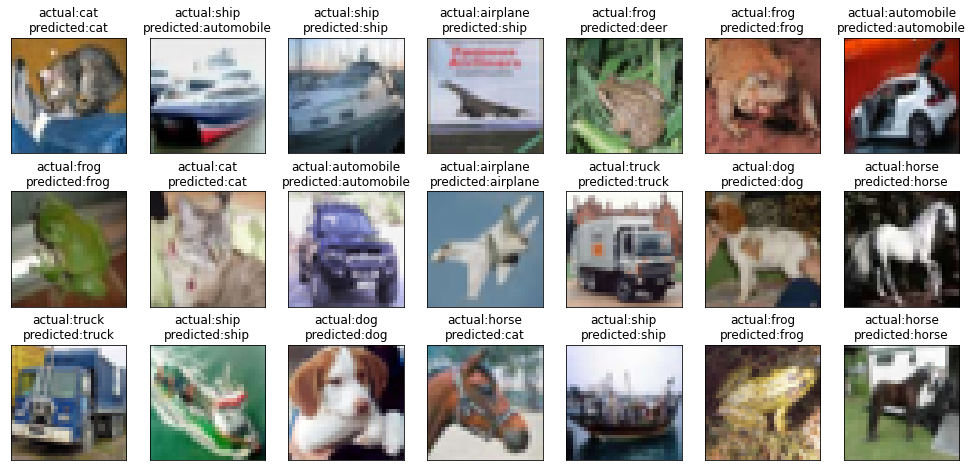

In [33]:
#https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test_ohe[index][0]] + '\n' 
                            + 'predicted:' + labels[y_pred_ohe[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

## **Plot confusion matrix**

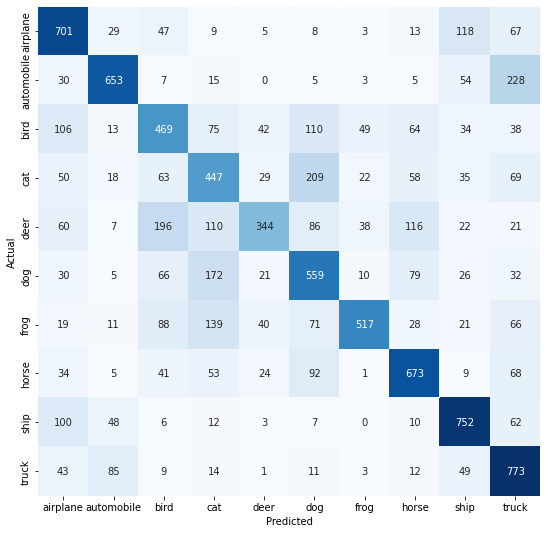

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_ohe, y_pred_ohe)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_ohe, y_pred_ohe))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1000
           1       0.75      0.65      0.70      1000
           2       0.47      0.47      0.47      1000
           3       0.43      0.45      0.44      1000
           4       0.68      0.34      0.46      1000
           5       0.48      0.56      0.52      1000
           6       0.80      0.52      0.63      1000
           7       0.64      0.67      0.65      1000
           8       0.67      0.75      0.71      1000
           9       0.54      0.77      0.64      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000



## Save Model to JSON, YAML, HDF5

In [ ]:
#Access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_folder = "/content/drive/My Drive/Colab Notebooks/"
model_CNN.save(base_folder + 'result/CNN_CIFAR.h5')

In [ ]:
from tensorflow.keras.models import load_model

model_CNN = load_model(base_folder + 'result/CNN_CIFAR.h5')

## Convert h5 to TensorflowLite

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model_CNN)
tflite_model = converter.convert()
open(base_folder + 'result/model_CNN.tflite', "wb").write(tflite_model)

12911108